## NLP Steps

### Tokenize
### Filter stopwords
### Stemming Words
### Parts of speech tagging
### Named Entity Recognition chunking
### Sentiment Analyze
### Frequently Appeared Words

### ***Optional (Graphs and Other things)

In [1]:
import nltk
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer,WordNetLemmatizer
from nltk.tag import pos_tag,pos_tag_sents
from nltk.chunk import ne_chunk
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.probability import FreqDist

import plotly.graph_objects as go
import plotly.express as exp
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
def word_preprocess(text):
    text = text.lower()
    tokens = word_tokenize(text)
    stop = set(stopwords.words("english"))
    filter_text = [token for token in tokens if token not in stop]
    return filter_text

def frequency_distribution(tokens):
    freq_dist = FreqDist(tokens)
    freq_dist = freq_dist.most_common()
    return freq_dist

def parts_of_speech(tokens):
    pos = pos_tag(tokens)
    return pos

def stem(text):
    ps = PorterStemmer(mode="NLTK_EXTENSIONS")
    ps = ps.stem(text)
    return ps

def named_entity_creation(text):
    pos_tag_token = pos_tag(word_tokenize(text))
    chunk = ne_chunk(pos_tag_token)
    return chunk

def sentiment_analyze(text):
    sia = SentimentIntensityAnalyzer()
    sia = sia.polarity_scores(text)
    return sia

In [3]:
#pre-entered self choice texts
text1 = "Hey, I know that this thing looks weird, but it is helpful for us, because it is our future. But if you did not learn this technique, you will be labelled as dumb."
text2 = "I'am Good"
text3 = "Worst place ever"
sent = [text1,text2,text3]

for i in sent:
    process = word_preprocess(i)
    most_commons = frequency_distribution(process)
    pos = parts_of_speech(process)
    stemmiing = stem(i)
    ne = named_entity_creation(i)
    sentimental = sentiment_analyze(i)
    
    print(" ")
    print("Tokenized : ", process)
    print("Frequency of most commons : ", most_commons)
    print("Parts of speech : ", pos)
    print("Stemming : ", stemmiing)
    print("Named Entity Chunking : ", ne)
    print("Sentiment Analyze Score : ", sentimental)

    neg = sentimental.get('neg')
    neu = sentimental.get('neu')
    pos = sentimental.get('pos')
    compound = sentimental.get('compound')

    if neg>=0.25:
        print("This text/sentense is negative")
    elif pos > 0.25:
        print("This text/sentense is positive")
    elif neu>=0.25:
        print("This text/sentense is neutral") 
    else:
        print("What do you want to say, pal!")
        

 
Tokenized :  ['hey', ',', 'know', 'thing', 'looks', 'weird', ',', 'helpful', 'us', ',', 'future', '.', 'learn', 'technique', ',', 'labelled', 'dumb', '.']
Frequency of most commons :  [(',', 4), ('.', 2), ('hey', 1), ('know', 1), ('thing', 1), ('looks', 1), ('weird', 1), ('helpful', 1), ('us', 1), ('future', 1), ('learn', 1), ('technique', 1), ('labelled', 1), ('dumb', 1)]
Parts of speech :  [('hey', 'NN'), (',', ','), ('know', 'VBP'), ('thing', 'NN'), ('looks', 'VBZ'), ('weird', 'JJ'), (',', ','), ('helpful', 'JJ'), ('us', 'PRP'), (',', ','), ('future', 'NN'), ('.', '.'), ('learn', 'NN'), ('technique', 'NN'), (',', ','), ('labelled', 'VBD'), ('dumb', 'NN'), ('.', '.')]
Stemming :  hey, i know that this thing looks weird, but it is helpful for us, because it is our future. but if you did not learn this technique, you will be labelled as dumb.
Named Entity Chunking :  (S
  (GPE Hey/NNP)
  ,/,
  I/PRP
  know/VBP
  that/IN
  this/DT
  thing/NN
  looks/VBZ
  weird/JJ
  ,/,
  but/CC
  it/

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer,TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer

In [5]:
cv = CountVectorizer()

BOW = cv.fit_transform(sent).toarray()
vocab = cv.vocabulary_
feature_names = cv.get_feature_names_out()

print("Bag of words Vocabulary : ",vocab)
print("Bag of words features : ", feature_names)
print(BOW)

Bag of words Vocabulary :  {'hey': 12, 'know': 16, 'that': 24, 'this': 26, 'thing': 25, 'looks': 19, 'weird': 28, 'but': 4, 'it': 15, 'is': 14, 'helpful': 11, 'for': 8, 'us': 27, 'because': 3, 'our': 21, 'future': 9, 'if': 13, 'you': 31, 'did': 5, 'not': 20, 'learn': 18, 'technique': 23, 'will': 29, 'be': 2, 'labelled': 17, 'as': 1, 'dumb': 6, 'am': 0, 'good': 10, 'worst': 30, 'place': 22, 'ever': 7}
Bag of words features :  ['am' 'as' 'be' 'because' 'but' 'did' 'dumb' 'ever' 'for' 'future' 'good'
 'helpful' 'hey' 'if' 'is' 'it' 'know' 'labelled' 'learn' 'looks' 'not'
 'our' 'place' 'technique' 'that' 'thing' 'this' 'us' 'weird' 'will'
 'worst' 'you']
[[0 1 1 1 2 1 1 0 1 1 0 1 1 1 2 2 1 1 1 1 1 1 0 1 1 1 2 1 1 1 0 2]
 [1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0]]


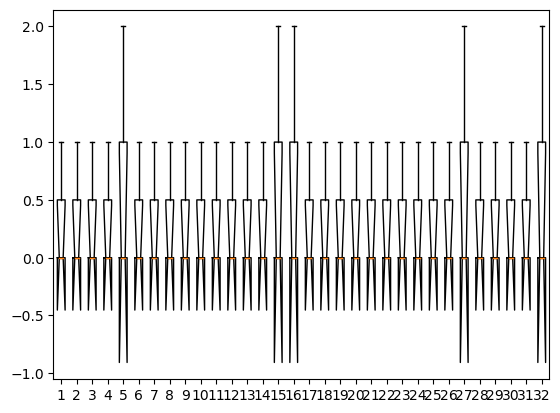

In [6]:
plt.boxplot(BOW, vocab)
plt.show()

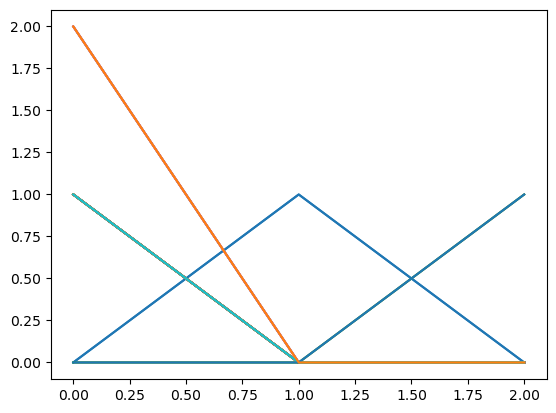

In [7]:
plt.plot(BOW, scaley=True)
plt.show()

<Axes: >

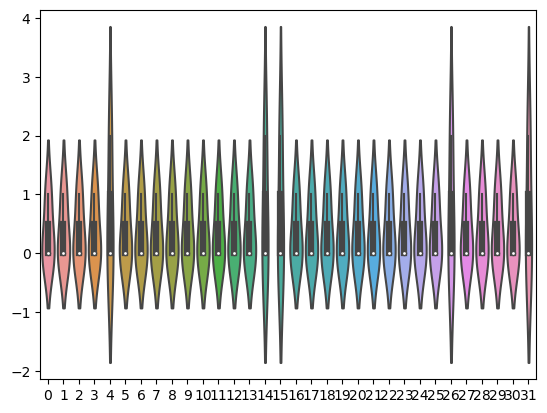

In [8]:
sb.violinplot(BOW)

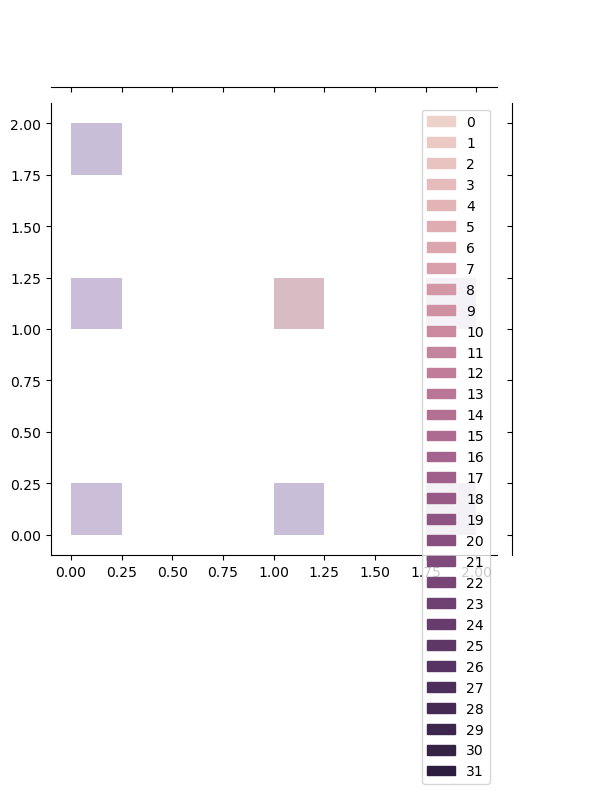

In [9]:
joint = sb.JointGrid(BOW)
joint.plot(sb.histplot, sb.scatterplot)

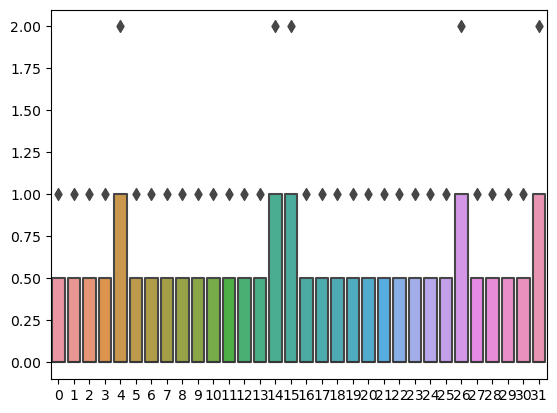

In [10]:
pair = sb.boxenplot(BOW)

<Axes: >

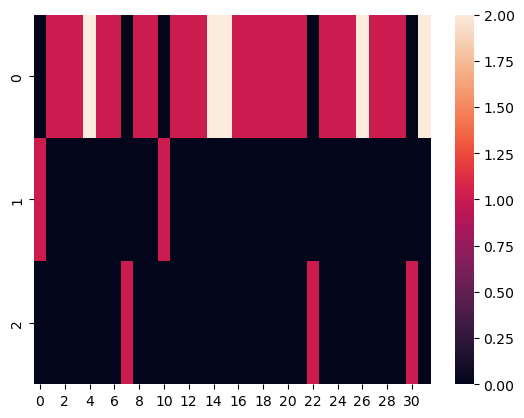

In [11]:
sb.heatmap(BOW)

<Axes: >

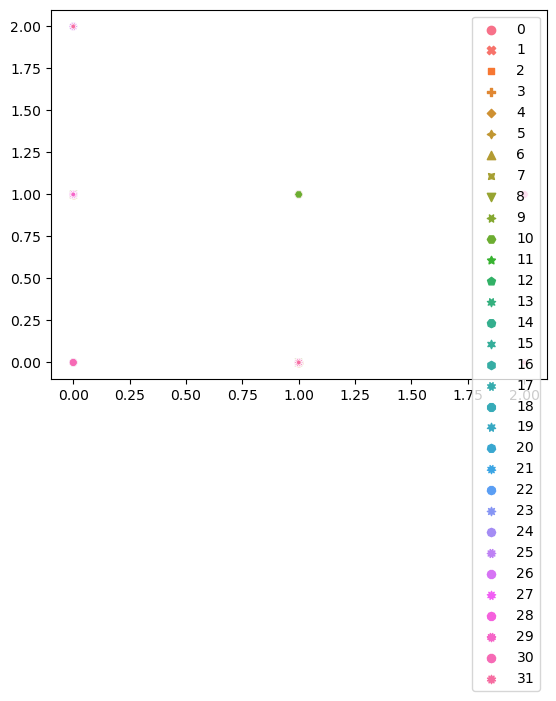

In [12]:
sb.scatterplot(BOW)

<Axes: >

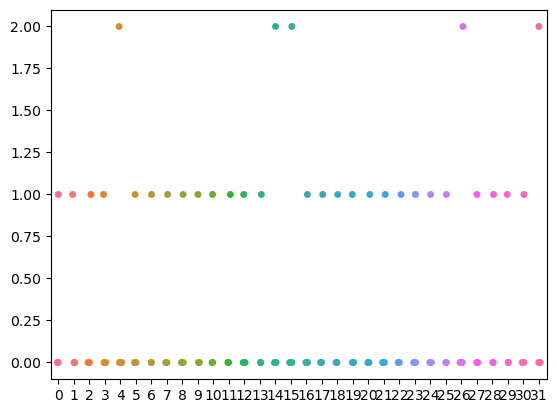

In [13]:
sb.stripplot(BOW)

C:\Users\Dhruv\AppData\Local\Temp\ipykernel_2284\1554930537.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(BOW)


<Axes: ylabel='Count'>

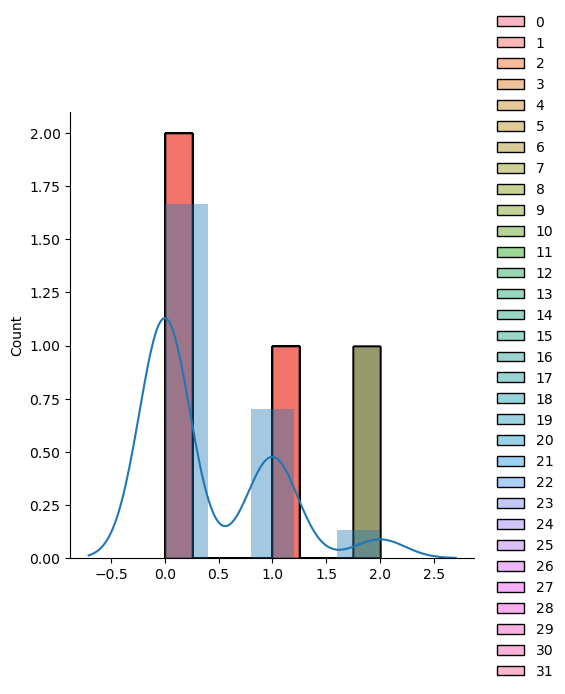

In [14]:
sb.displot(BOW)
sb.distplot(BOW)

In [15]:
tfidf_vectorizer = TfidfVectorizer()

tfidf = tfidf_vectorizer.fit_transform(sent).toarray()
tfidf_vocab = tfidf_vectorizer.vocabulary_
tfidf_features = tfidf_vectorizer.get_feature_names_out()

print("TF-IDF Vocabulary : ",tfidf_vocab)
print("TF-IDF Features : ",tfidf_features)
print("TF-IDF : ",tfidf)

TF-IDF Vocabulary :  {'hey': 12, 'know': 16, 'that': 24, 'this': 26, 'thing': 25, 'looks': 19, 'weird': 28, 'but': 4, 'it': 15, 'is': 14, 'helpful': 11, 'for': 8, 'us': 27, 'because': 3, 'our': 21, 'future': 9, 'if': 13, 'you': 31, 'did': 5, 'not': 20, 'learn': 18, 'technique': 23, 'will': 29, 'be': 2, 'labelled': 17, 'as': 1, 'dumb': 6, 'am': 0, 'good': 10, 'worst': 30, 'place': 22, 'ever': 7}
TF-IDF Features :  ['am' 'as' 'be' 'because' 'but' 'did' 'dumb' 'ever' 'for' 'future' 'good'
 'helpful' 'hey' 'if' 'is' 'it' 'know' 'labelled' 'learn' 'looks' 'not'
 'our' 'place' 'technique' 'that' 'thing' 'this' 'us' 'weird' 'will'
 'worst' 'you']
TF-IDF :  [[0.         0.15430335 0.15430335 0.15430335 0.3086067  0.15430335
  0.15430335 0.         0.15430335 0.15430335 0.         0.15430335
  0.15430335 0.15430335 0.3086067  0.3086067  0.15430335 0.15430335
  0.15430335 0.15430335 0.15430335 0.15430335 0.         0.15430335
  0.15430335 0.15430335 0.3086067  0.15430335 0.15430335 0.15430335
  

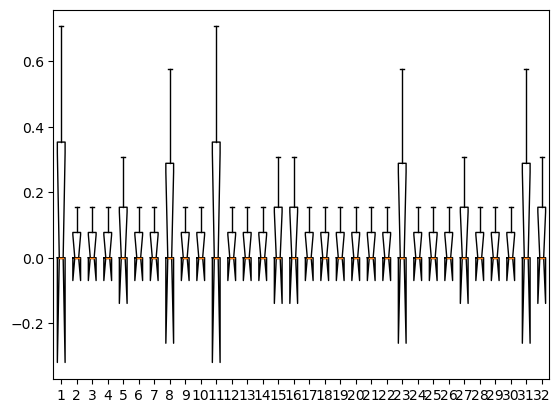

In [16]:
plt.boxplot(tfidf, tfidf_vocab)
plt.show()

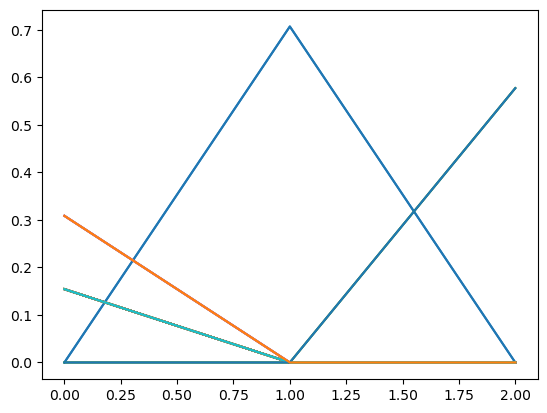

In [17]:
plt.plot(tfidf, scaley=True)
plt.show()

<Axes: >

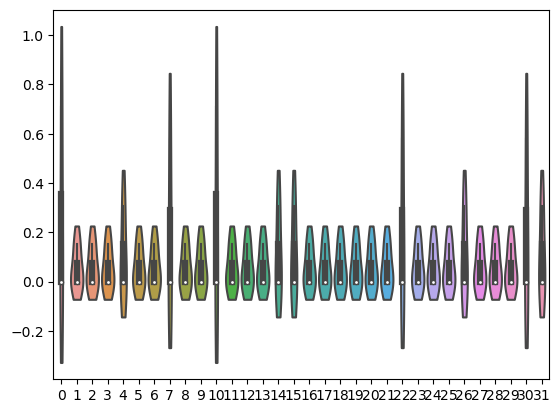

In [18]:
sb.violinplot(tfidf, cut=True)

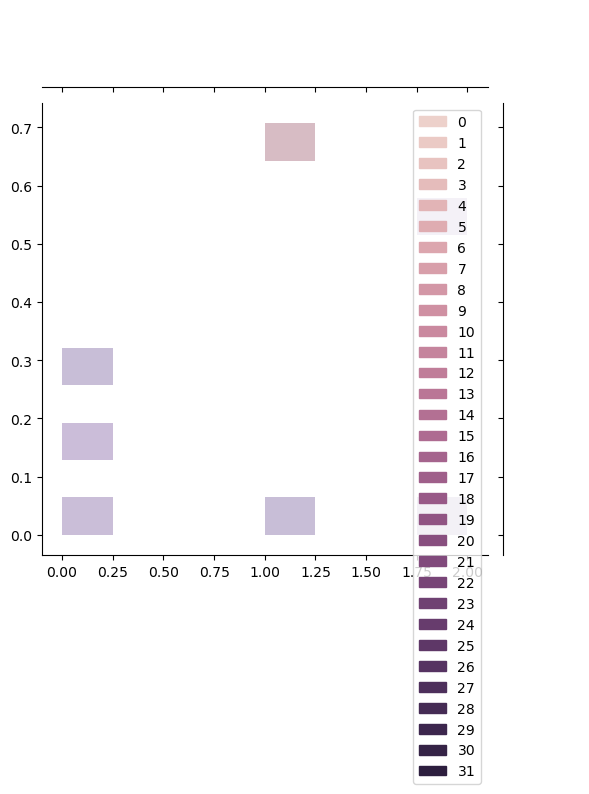

In [19]:
joint = sb.JointGrid(tfidf)
joint.plot(sb.histplot, sb.scatterplot)

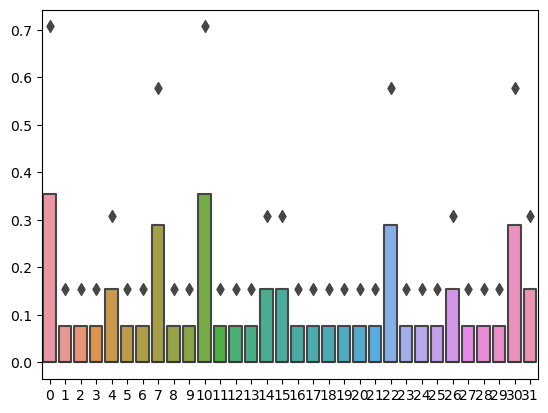

In [20]:
pair = sb.boxenplot(tfidf)

<Axes: >

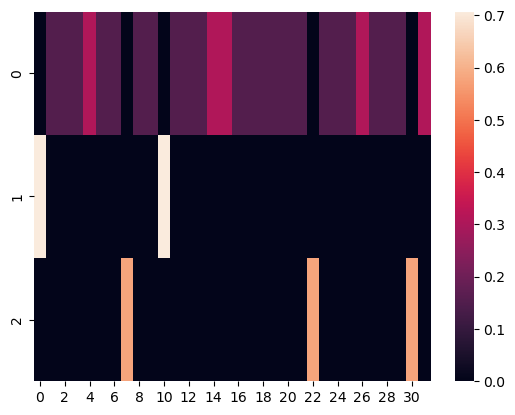

In [21]:
sb.heatmap(tfidf)

<Axes: >

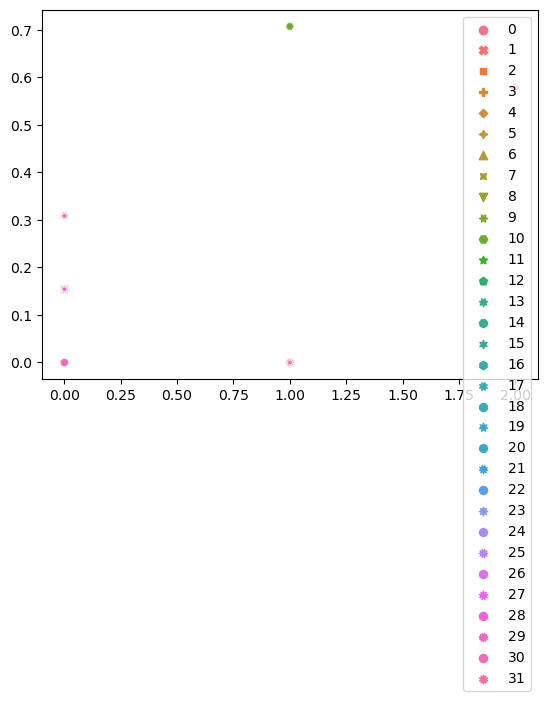

In [22]:
sb.scatterplot(tfidf)

<Axes: >

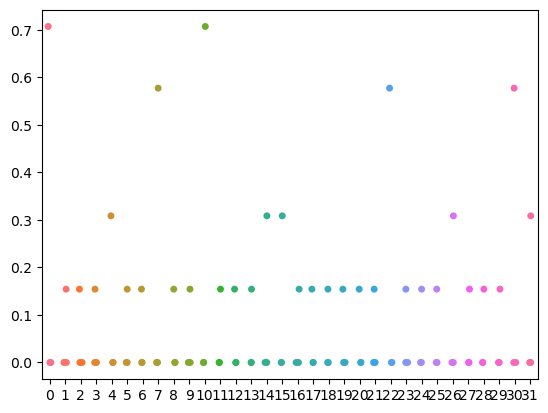

In [23]:
sb.stripplot(tfidf)

C:\Users\Dhruv\AppData\Local\Temp\ipykernel_2284\296966040.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(tfidf)


<Axes: ylabel='Count'>

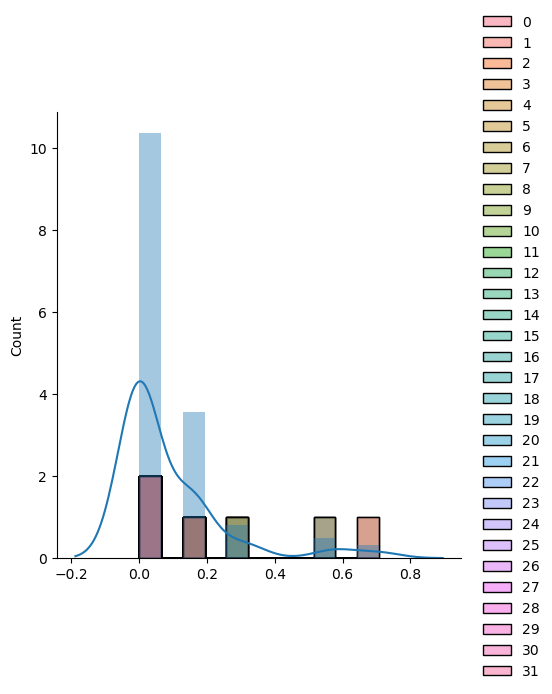

In [24]:
sb.displot(tfidf)
sb.distplot(tfidf)

In [25]:
#User-based interest text choices
user_text1 = input("Enter text/sentense : ")
user_text2 = input("Enter text/sentense : ")
user_text3 = input("Enter text/sentense")
userchoice = [user_text1, user_text2, user_text3]

for i in userchoice:
    process = word_preprocess(i)
    most_commons = frequency_distribution(process)
    pos = parts_of_speech(process)
    stemmiing = stem(i)
    ne = named_entity_creation(i)
    sentimental = sentiment_analyze(i)
    
    print(" ")
    print("Tokenized : ", process)
    print("Frequency of most commons : ", most_commons)
    print("Parts of speech : ", pos)
    print("Stemming : ", stemmiing)
    print("Named Entity Chunking : ", ne)
    print("Sentiment Analyze Score : ", sentimental)

    neg = sentimental.get('neg')
    neu = sentimental.get('neu')
    pos = sentimental.get('pos')
    compound = sentimental.get('compound')

    if neg>=0.25:
        print("This text/sentense is negative")
    elif pos > 0.25:
        print("This text/sentense is positive")
    elif neu>=0.25:
        print("This text/sentense is neutral") 
    else:
        print("What do you want to say, pal!")

Enter text/sentense : Everything will be fine
Enter text/sentense : You are the best
Enter text/sentensei have never met this dumb jackass person in my life
 
Tokenized :  ['everything', 'fine']
Frequency of most commons :  [('everything', 1), ('fine', 1)]
Parts of speech :  [('everything', 'NN'), ('fine', 'NN')]
Stemming :  everything will be fin
Named Entity Chunking :  (S Everything/NN will/MD be/VB fine/JJ)
Sentiment Analyze Score :  {'neg': 0.0, 'neu': 0.625, 'pos': 0.375, 'compound': 0.2023}
This text/sentense is positive
 
Tokenized :  ['best']
Frequency of most commons :  [('best', 1)]
Parts of speech :  [('best', 'JJS')]
Stemming :  you are the best
Named Entity Chunking :  (S You/PRP are/VBP the/DT best/JJS)
Sentiment Analyze Score :  {'neg': 0.0, 'neu': 0.417, 'pos': 0.583, 'compound': 0.6369}
This text/sentense is positive
 
Tokenized :  ['never', 'met', 'dumb', 'jackass', 'person', 'life']
Frequency of most commons :  [('never', 1), ('met', 1), ('dumb', 1), ('jackass', 1),

In [26]:
cv = CountVectorizer()

BOW = cv.fit_transform(userchoice).toarray()
vocab = cv.vocabulary_
feature_names = cv.get_feature_names_out()

print("Bag of words Vocabulary : ",vocab)
print("Bag of words features : ", feature_names)
print(BOW)

Bag of words Vocabulary :  {'everything': 4, 'will': 16, 'be': 1, 'fine': 5, 'you': 17, 'are': 0, 'the': 14, 'best': 2, 'have': 6, 'never': 12, 'met': 10, 'this': 15, 'dumb': 3, 'jackass': 8, 'person': 13, 'in': 7, 'my': 11, 'life': 9}
Bag of words features :  ['are' 'be' 'best' 'dumb' 'everything' 'fine' 'have' 'in' 'jackass' 'life'
 'met' 'my' 'never' 'person' 'the' 'this' 'will' 'you']
[[0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0]
 [1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1]
 [0 0 0 1 0 0 1 1 1 1 1 1 1 1 0 1 0 0]]


In [27]:
tfidf_vectorizer = TfidfVectorizer()

tfidf = tfidf_vectorizer.fit_transform(userchoice).toarray()
tfidf_vocab = tfidf_vectorizer.vocabulary_
tfidf_features = tfidf_vectorizer.get_feature_names_out()

print("TF-IDF Vocabulary : ",tfidf_vocab)
print("TF-IDF Features : ",tfidf_features)
print("TF-IDF : ",tfidf)

TF-IDF Vocabulary :  {'everything': 4, 'will': 16, 'be': 1, 'fine': 5, 'you': 17, 'are': 0, 'the': 14, 'best': 2, 'have': 6, 'never': 12, 'met': 10, 'this': 15, 'dumb': 3, 'jackass': 8, 'person': 13, 'in': 7, 'my': 11, 'life': 9}
TF-IDF Features :  ['are' 'be' 'best' 'dumb' 'everything' 'fine' 'have' 'in' 'jackass' 'life'
 'met' 'my' 'never' 'person' 'the' 'this' 'will' 'you']
TF-IDF :  [[0.         0.5        0.         0.         0.5        0.5
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.5        0.        ]
 [0.5        0.         0.5        0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.5        0.         0.         0.5       ]
 [0.         0.         0.         0.31622777 0.         0.
  0.31622777 0.31622777 0.31622777 0.31622777 0.31622777 0.31622777
  0.31622777 0.31622777 0.         0.31622777 0.         0.        ]]


##### Optional you can create your own graphs of text analysed data